SYMPY

In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
from sympy import init_printing
init_printing()

In [3]:
x= sympy.symbols('x')

In [4]:
x

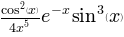

In [5]:
Result = sympy.cos(x)**2*sympy.sin(x)**3/(4*x**5*sympy.exp(x))
Result

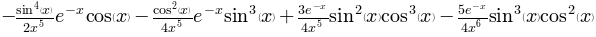

In [6]:
Resultprime = Result.diff(x)
Resultprime

In [7]:
from sympy.utilities.lambdify import lambdify
u = Resultprime
print(u)

-exp(-x)*sin(x)**4*cos(x)/(2*x**5) - exp(-x)*sin(x)**3*cos(x)**2/(4*x**5) + 3*exp(-x)*sin(x)**2*cos(x)**3/(4*x**5) - 5*exp(-x)*sin(x)**3*cos(x)**2/(4*x**6)


In [8]:
u_lamb = lambdify((x), u)
print("The value of u at x=2.2 is {}.".format(u_lamb(2.2)))

The value of u at x=2.2 is -0.00026648912670920613.


traffic flow

In [150]:
Vm = 80 #constants
L = 11
rhom = 250
nx = 51
dx = L/(nx-1)
dt = 0.001
T = 3.0
nt = int(T/60/dt)
x = numpy.linspace(0,L,nx)

rho = numpy.ones(nx) #arrays
rhon = numpy.ones(nx)
rho = numpy.ones(nx)*10
rho[10:20] = 50

print(nt)

50


In [155]:
def Vminandavg(rho, Vm, rhom):
    V = numpy.ones(nx)
    V = Vm*(1-rho/rhom)
    print("total V",numpy.sum(V),"Avg V",numpy.sum(V)/nx)
    n = numpy.min(V)
    print(n,"km/h")
    n = n/3.6
    print(n,"m/s")

In [156]:
Vminandavg(rho0, Vm, rhom)

total V 3788.8 Avg V 74.2901960784
64.0 km/h
17.7777777778 m/s


minimum velocity at time t = 0

In [153]:
print(rho)

[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]


In [154]:
for n in range(1, nt):  
    rhon = rho.copy() 
    rho[1:] = rhon[1:]-Vm*dt/dx*(rhon[1:]-rhon[0:-1])+Vm/rhom*dt/dx*(rhon[1:]**2-rhon[0:-1]**2)
    rho[0] = 10

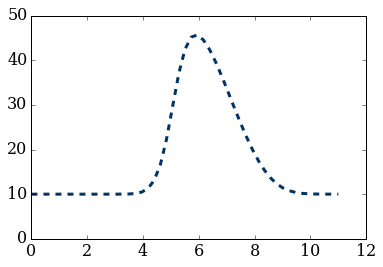

In [139]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,50);

909.999813519 17.8431335984


In [144]:
Vmin(rho, Vm, rhom)

[ 76.8         76.8         76.8         76.8         76.8         76.8
  76.8         76.8         76.8         76.8         76.8         76.8
  76.8         76.8         76.8         76.8         76.8         76.79999999
  76.79999995  76.79999973  76.79999868  76.79999429  76.79997749
  76.79991853  76.79972768  76.7991544   76.79754823  76.79333072
  76.78290668  76.75856622  76.70472809  76.59182817  76.36788412
  75.95087676  75.23312983  74.12021734  72.61956629  70.92727471
  69.3845586   68.2821596   67.71144002  67.59594581  67.80288534
  68.21534106  68.7511812   69.3575938   70.00115409  70.6600242
  71.31898807  71.96655396  72.59334456]
67.595945813 km/h
18.7766516147 m/s
